<a href="https://colab.research.google.com/github/neilsubick/data_analytics/blob/main/Machine_Learning_Linear_Regression_1_Guided_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Linear Regression on Boston Housing Dataset

## Data Background and Problem Statement

We will take the Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

# Task 1 : Environment Set up

In [44]:
#import required libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Task 2 : Data Collection

https://scikit-learn.org/stable/

In [45]:
# import the boston dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston_dataset.keys()
print(boston_dataset['feature_names'])


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Boston Dataset is a Dictionary. 

*   print the values to understand the dataset

* Data  -  information for various houses
* Target  - price of the houses
* Feature_names  - name of the features
* DESCR - describes the datas








***Print the keys and DESCR to the Boston Dataset ***

In [46]:
print(boston_dataset.keys())
boston_dataset.DESCR

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

Dataset 
* CRIM: Per capita crime rate by town
* ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
* INDUS: Proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: Nitric oxide concentration (parts per 10 million)
* RM: Average number of rooms per dwelling
* AGE: Proportion of owner-occupied units built prior to 1940
* DIS: Weighted distances to five Boston employment centers
* RAD: Index of accessibility to radial highways
* TAX: Property tax rate 
* PTRATIO: Pupil-teacher ratio by town
* B: 1000(Bk—0.63)², where Bk is the proportion of [people of African American descent] by town
* LSTAT: Percentage of lower status of the population
* MEDV: Median value of owner-occupied homes in $1000s






















1.   Create a pandas dataframe and store the data**
2.   Rename Features_Name to Columns
3.   Add a new column called Price that is set to Target






In [47]:
# create a pandas dataframe and store the data
df_boston = pd.DataFrame(boston_dataset.data)
df_boston.columns = boston_dataset.feature_names
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [48]:
# append Price, target, as a new columnn to the dataset
df_boston ['Price'] = boston_dataset.target

Print the Top 10 Observations

In [49]:
df_boston.head(25)
df_boston.tail(25)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
481,5.70818,0.0,18.10,0.0,0.532,6.750,74.9,3.3317,24.0,666.0,20.2,393.07,7.74,23.7
482,5.73116,0.0,18.10,0.0,0.532,7.061,77.0,3.4106,24.0,666.0,20.2,395.28,7.01,25.0
483,2.81838,0.0,18.10,0.0,0.532,5.762,40.3,4.0983,24.0,666.0,20.2,392.92,10.42,21.8
484,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34,20.6
485,3.67367,0.0,18.10,0.0,0.583,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58,21.2
486,5.69175,0.0,18.10,0.0,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98,19.1
487,4.83567,0.0,18.10,0.0,0.583,5.905,53.2,3.1523,24.0,666.0,20.2,388.22,11.45,20.6
488,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4.0,711.0,20.1,395.09,18.06,15.2
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97,7.0
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,8.1


# Task 3: Data PreProcessing

It is always a good ideaa to see if there are any null values

In [50]:
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

# Task 4 : Data Wrangling and EDA (Exploratory Data Analysis)

**Exploratory Data Analysis is a very important step before training the model**

* We will use Visualization to understand the relationship of the target variable with other features.



Plot the distribution of our target variable "Price"

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


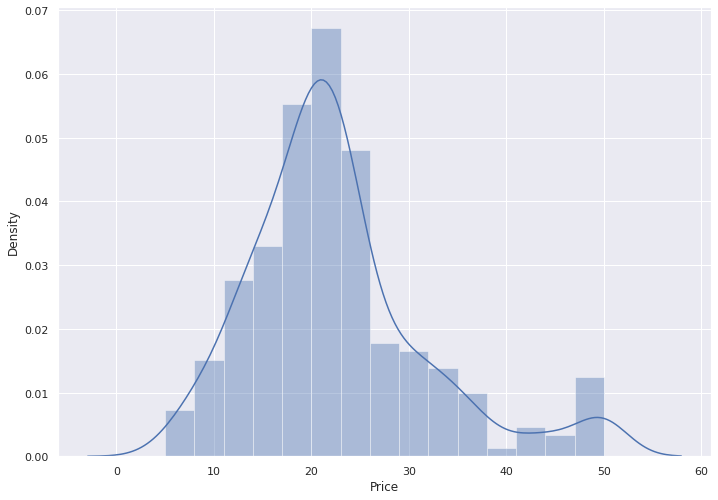

In [51]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_boston['Price'], bins=15)
plt.show()


#  Create a correlation matrix that measures the linear relationships between the variables

**Correlation Matrix** is a table showing correlation coefficients between variables.
*   Each cells shows you the correlation between the two variables.
*   Use corr function from panda dataframe library
*   Use Heatmap function from seaborn




Correlation Coefficients range from 1 to -1
* Closer to 1 - there is a positive correlation (as x increases, y increases)
* Closer to -1 - there is a negative correlation (as x increases y decreases)



1.   Create a new dataframe called Correlation_matrix
2.   Display the correlation values to 2 decimal points
3.   Print a heatmap using your new dataframe as the data source
4.   Set annot = True to print the values inside the squares






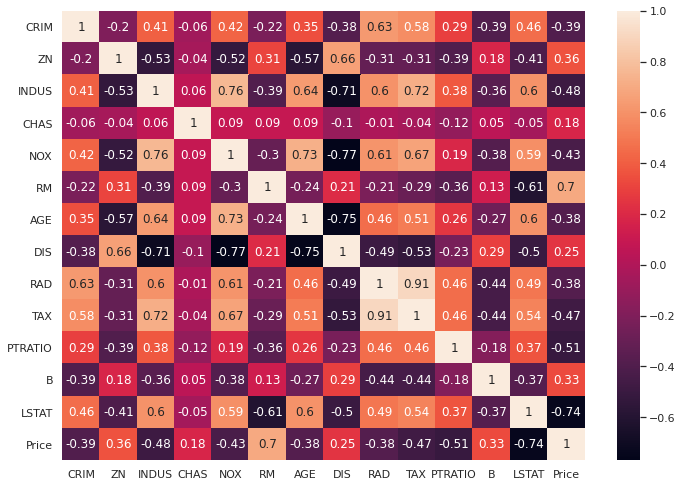

In [52]:
correlation_matrix = df_boston.corr().round(2)
correlation_matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

# Write Your Observations

**SCATTERPLOT WITH RM & LSTAT**


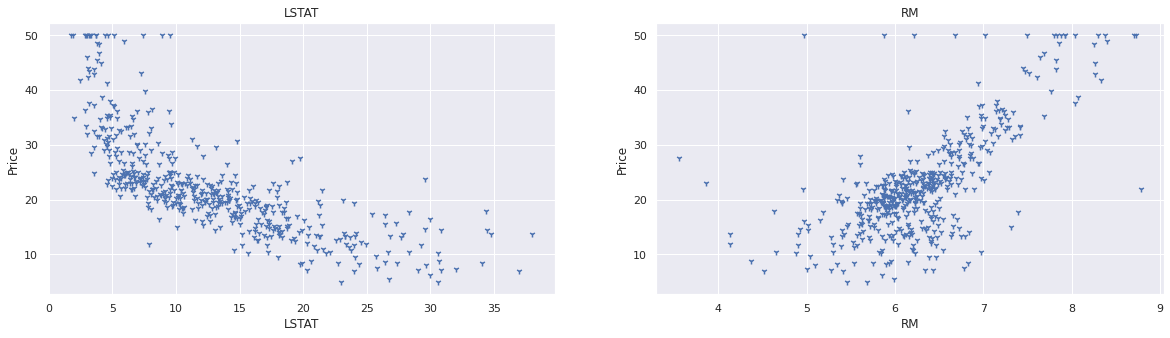

In [53]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df_boston['Price']

for i, col in enumerate(features):
    plt.subplot(1, len(features),i+1)
    x = df_boston[col]
    y = target
    plt.scatter(x, y, marker='1')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Price') 

**Observations:**

* The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50
* The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.



# Preparing the data for training the Machine Learning Model

1.  Assign feature on X axis
2.  Assign features on Y axis



In [54]:
# assign features on X axis 
x_features = boston_dataset.data

In [55]:
# assign target on Y axis 
Y_target = boston_dataset.target

# Build Linear Regression Model

We use scikit-learn’s LinearRegression to train our model on both the training and test sets.

In [56]:
# import linear model - the estimator
from sklearn.linear_model import LinearRegression
lineReg = LinearRegression()

In [57]:
# fit data into the the estimator
lineReg.fit(x_features, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Straight line  y = mx + b
* m - the slope of the line - changes in x, changes in y
* b - the intercept where the line crosses the  y axis
      *  b is the expected mean value of Y when X = 0
      *  b is irrelevant when X is never equal to 0 





1.  Print the Intercept
2.  Print the coefficient



In [58]:
# print the intercept 
print('the estimated intercept %.2f '%lineReg.intercept_)

the estimated intercept 36.46 


In [59]:
# print the coefficient 
print('the coefficient is %d '%len(lineReg.coef_))
lineReg.coef_

the coefficient is 13 


array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

#Observation





# Model Training

**Splitting the data into training and testing sets**
*  We train the model with 80% of the samples and test with the remaining 20%
*   use train_test_split to split the dataset



1.  Split the dataset into Train and Test datasets




In [64]:
# train model split the whole dataset into train and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x_features, Y_target, test_size = 0.2, random_state=0)

In [60]:
# print the dataset shape
print(boston_dataset.data.shape)

(506, 13)


In [61]:
# Print shapes of the training and testing data sets
print(x_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(404, 13)
(102, 13)
(404,)
(102,)


**Training the Model**

In [65]:
lineReg.fit(x_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Caluclate RMSE and R Square:


**We will evaluate our model using RMSE and R2-score**

Import Mean Squared Error and R2 Score

In [66]:
from sklearn.metrics import mean_squared_error, r2_score

Create our Y Train Predict Variable

In [67]:
y_train_predict = lineReg.predict(x_train)

Calculate RMSE and R2 - TRAIN

In [70]:
rmse = np.sqrt(mean_squared_error(Y_train, y_train_predict))

In [ ]:
r2 = r2_score(Y_train, y_train_predict)

In [68]:
print("The model performace for training set")
print("-----------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performace for training set
-----------------------------------
RMSE is 5.783509315085133
R2 score is 0.5892223849182512




Evaluate TEST Set

In [71]:
# model evaluation for testing set
y_test_predict = lineReg.predict(x_test)

# root mean square error of the medel
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

#r-squared score of the model
r2 =  r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
------------------------------------
RMSE is 5.783509315085133
R2 score is 0.5892223849182512


Plot our Test Model

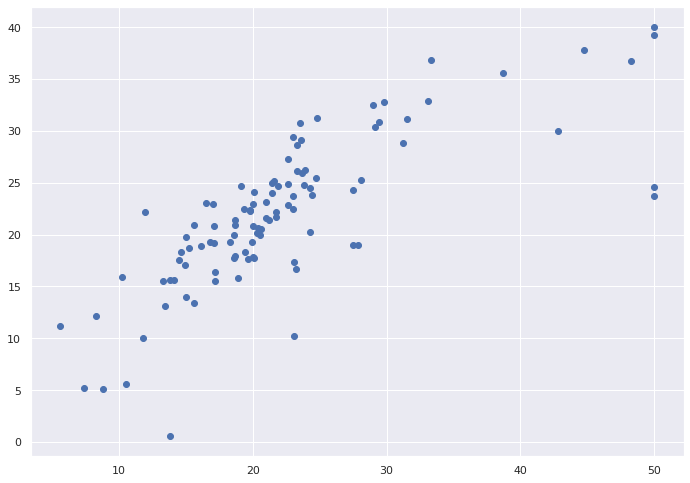

In [72]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()

# Your Conclusion 